In [1]:
import nibabel as nib
import numpy as np
import nibabel as nib
import cortex
# Load fsaverage geometry (left hemisphere example)
fsaverage_lh = nib.freesurfer.read_geometry("/Users/h/neuromaps-data/atlases/fsaverage/tpl-fsaverage_den-41k_hemi-L_pial.surf.gii")[0]  # Vertex coordinates

# Calculate distances between each MNI coordinate and surface vertices
mni_coords = np.array([[-20, -30, 60], [15, -40, 50], [5, -25, 70]])
distances = np.linalg.norm(fsaverage_lh[:, np.newaxis] - mni_coords, axis=2)

# Get the nearest vertex indices
nearest_vertices = distances.argmin(axis=0)

# Highlight the vertices on the flatmap
lh_data = np.zeros(fsaverage_lh.shape[0])
lh_data[nearest_vertices] = 1
vertex_data = cortex.Vertex(lh_data, subject="fsaverage", cmap="hot", vmin=0, vmax=1)
cortex.quickshow(vertex_data)


ValueError: File does not appear to be a Freesurfer surface

Generating a flatmap cache


RuntimeError: Inkscape doesn't seem to be installed on this system.SVGOverlay.get_texture requires inkscape.Please make sure that inkscape is installed and that is accessible from the terminal.

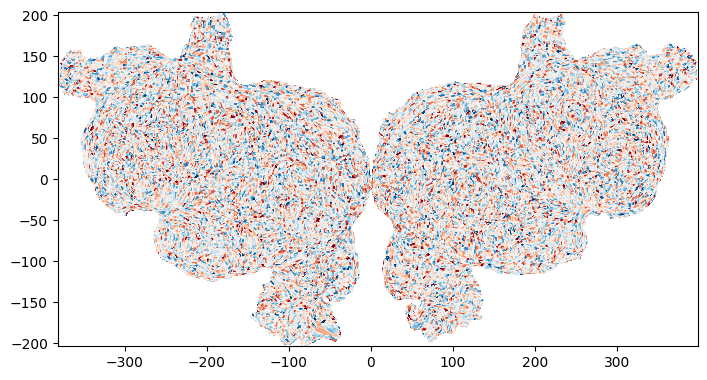

In [1]:
import cortex
import cortex.polyutils
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt

subject = 'S1'
xfm = 'fullhead'

# First create example voxel data for this subject and transform
voxel_data = np.random.randn(31, 100, 100)
voxel_vol = cortex.Volume(voxel_data, subject, xfm)

# Then we have to get a mapper from voxels to vertices for this transform
mapper = cortex.get_mapper(subject, xfm, 'line_nearest', recache=True)

# Just pass the voxel data through the mapper to get vertex data
vertex_map = mapper(voxel_vol)

# You can plot both as you would normally plot Volume and Vertex data
cortex.quickshow(voxel_vol)
plt.show()
cortex.quickshow(vertex_map)
plt.show()

# empty with NI coordinates

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



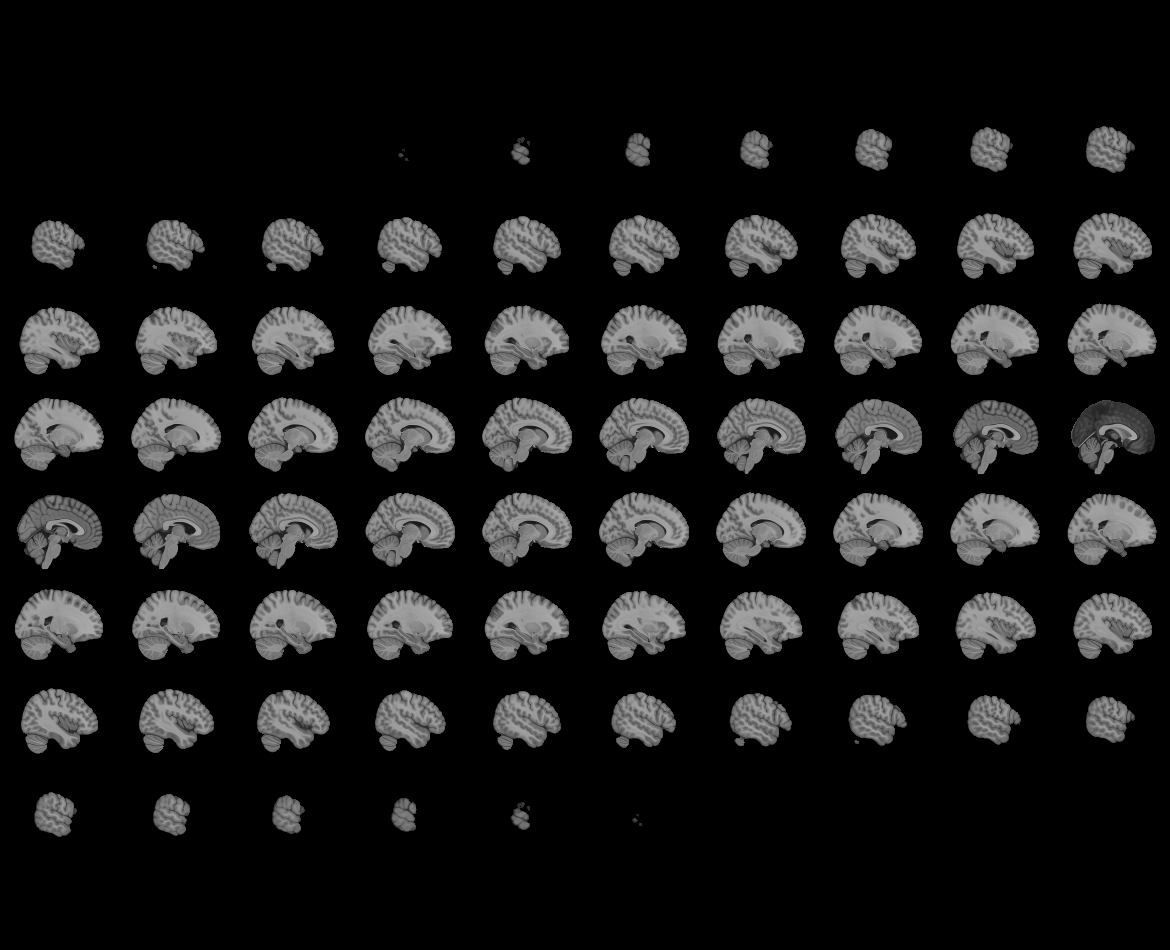
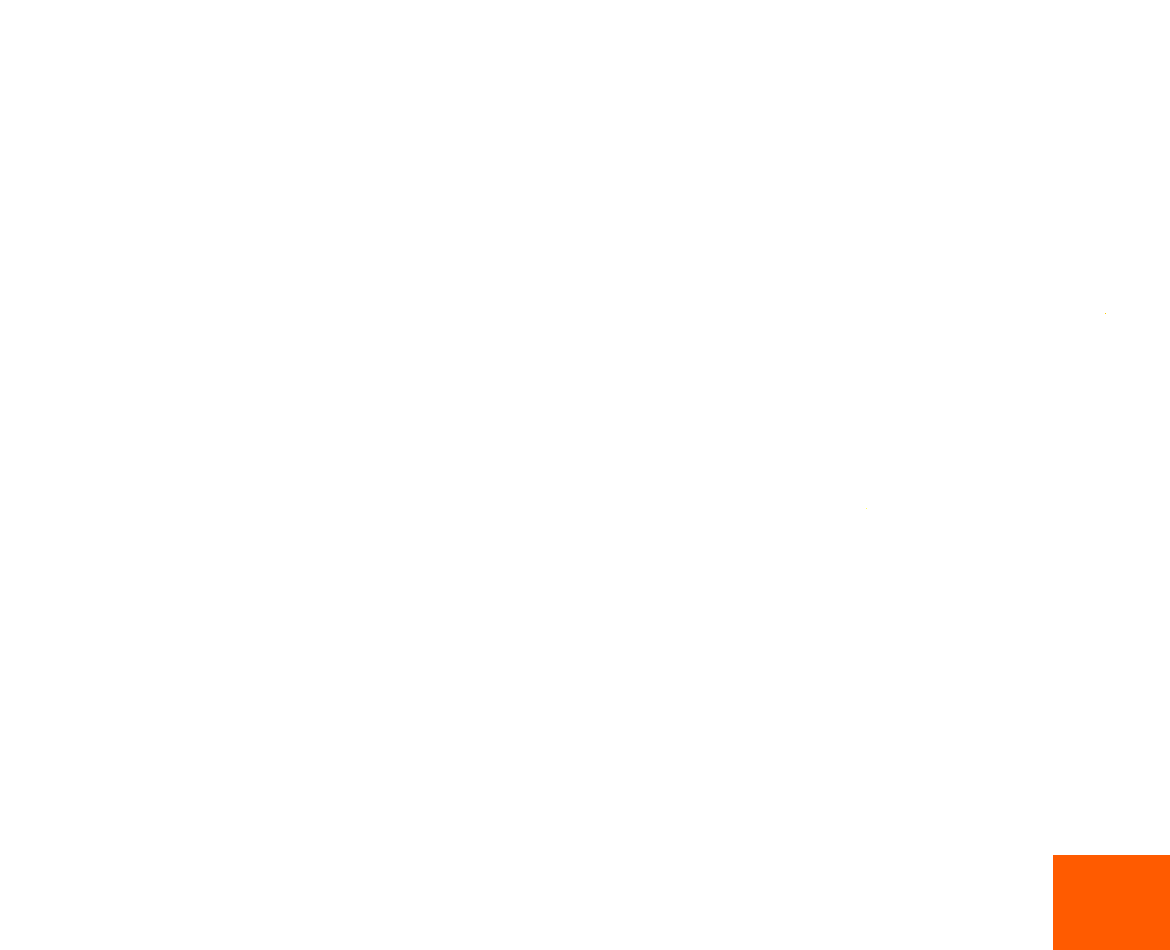

In [5]:
import nibabel as nib
import numpy as np

# Define MNI152 template dimensions and affine
volume_shape = (91, 109, 91)  # Standard dimensions for MNI152
affine = np.array([
    [-2, 0, 0, 90],
    [0, 2, 0, -126],
    [0, 0, 2, -72],
    [0, 0, 0, 1]
])  # Standard MNI affine

# Create an empty 3D volume filled with zeros
empty_volume = np.zeros(volume_shape)

# Save this empty volume as a NIfTI file (optional, for verification)
nifti_img = nib.Nifti1Image(empty_volume, affine)
nib.save(nifti_img, "empty_mni_volume.nii.gz")


from nibabel.affines import apply_affine

# Define your MNI coordinates and the corresponding values
mni_coords = np.array([
    [-20, -30, 60],  # Example MNI coordinate 1
    [15, -40, 50],   # Example MNI coordinate 2
    [5, -25, 70]     # Example MNI coordinate 3
])
values = [1, 2, 3]  # Values to assign to each coordinate

# Convert MNI coordinates to voxel indices
voxel_indices = apply_affine(np.linalg.inv(affine), mni_coords).astype(int)

# Insert values into the volume
for idx, value in zip(voxel_indices, values):
    empty_volume[tuple(idx)] = value

# Save the modified volume as a new NIfTI file
modified_nifti = nib.Nifti1Image(empty_volume, affine)
nib.save(modified_nifti, "mni_points_volume.nii.gz")

from nilearn.plotting import view_img

# Visualize the modified volume
view_img(modified_nifti, threshold=0, cmap="hot")


# test code

In [21]:
target_shape

(31, 100, 100)

In [24]:
import cortex
import cortex.polyutils
import nibabel as nib
import numpy as np
from nibabel.affines import apply_affine
import matplotlib.pyplot as plt
import nilearn

subject = "S1"
xfm = "fullhead"
transform = cortex.db.get_xfm(subject, xfm)
target_affine = transform.xfm  # Get the affine for the subject's space
target_shape = transform.shape

mni_img = nib.load('mni_points_volume.nii.gz')
mni_data = mni_img.get_fdata()
mni_affine = mni_img.affine
resampled_img = nilearn.image.resample_img(
    mni_img,
    target_affine=target_affine,
    target_shape=target_shape,
    interpolation="nearest",
)
resampled_data = resampled_img.get_fdata()
voxel_vol = cortex.Volume(resampled_data, subject, xfm)
# Step 1: Create NIfTI volume from MNI points
# Define subject and transform for Pycortex
# subject = 'S1'
# xfm = 'fullhead'

# # Define MNI coordinates and values
# mni_coords = np.array([
#     [-20, -30, 60],  # Example MNI coordinate 1
#     [-20, -30, 61],   # Example MNI coordinate 2
#     [5, -25, 70]     # Example MNI coordinate 3
# ])
# values = [100, 200, 300]  # Values for each MNI coordinate

# # Create an empty volume for the given subject's space
# # volume_shape = (31, 100, 100)  # Adjust based on your subject's volume
# affine = np.array([
#     [-2, 0, 0, 90],
#     [0, 2, 0, -126],
#     [0, 0, 2, -72],
#     [0, 0, 0, 1]
# ])  # MNI affine

# # Initialize empty voxel data
# voxel_data = np.zeros(volume_shape)

# # Convert MNI coordinates to voxel indices
# voxel_indices = apply_affine(np.linalg.inv(affine), mni_coords).astype(int)

# # Add values to the corresponding voxel indices
# for idx, value in zip(voxel_indices, values):
#     if (0 <= idx[0] < volume_shape[0]) and (0 <= idx[1] < volume_shape[1]) and (0 <= idx[2] < volume_shape[2]):
#         voxel_data[tuple(idx)] = value

# Step 2: Use Pycortex to map voxels to vertices
# Wrap the voxel data in a Pycortex Volume object
# voxel_vol = cortex.Volume(voxel_data, subject, xfm)

# Get the mapper from voxels to vertices
mapper = cortex.get_mapper(subject, xfm, 'line_nearest', recache=True)

# Map voxel data to vertex data
vertex_map = mapper(voxel_vol)

# Step 3: Visualize the result
# Visualize the voxel data
cortex.quickshow(voxel_vol)
plt.show()

# Visualize the vertex data (flatmap)
cortex.quickshow(vertex_map)
plt.show()


AttributeError: 'list' object has no attribute 'shape'

In [22]:
import cortex

# First let's do this "manually", using cortex.mni
from cortex import mni

import numpy as np
np.random.seed(1234)


# This transform is gonna be from one specific functional space for a subject
# which is defined by the transform (xfm)
s1_to_mni = mni.compute_mni_transform(subject='S1', xfm='fullhead')
# s1_to_mni is a 4x4 array describing the transformation in homogeneous corods

# Transform data from MNI to subject space
# first we will create a dataset to transform
# this uses the implicitly created "identity" transform, which is used for data
# in the native anatomical space (i.e. same dims as the base anatomical image,
# and in the same space as the surface)
data = cortex.Volume.random('MNI', 'identity')

# then transform it into the space defined by the 'fullhead' transform for 'S1'
subject_data = mni.transform_mni_to_subject('S1', 'fullhead',
                                            data.data, s1_to_mni)
# subject_data is a nibabel Nifti1Image

subject_data_vol = mni_data.get_fdata() # the actual array, shape=(100,100,31)

# That was the manual method. pycortex can also cache these transforms for you
# if you get them using the pycortex database
s1_to_mni_db = cortex.db.get_mnixfm('S1', 'fullhead')
# this is the same as s1_to_mni, but will return instantly on subsequent calls


Generating brainmask anatomical...
Brain masking anatomical...
Calling: bet /Users/h/miniconda3/envs/spacetop/share/pycortex/db/S1/anatomicals/raw.nii.gz /Users/h/miniconda3/envs/spacetop/share/pycortex/db/S1/anatomicals/brainmask.nii.gz -B -v


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/cortex/mni.py:21: UserWarning: Can't find FSLDIR environment variable, assuming default FSL location..
  warnings.warn("Can't find FSLDIR environment variable, assuming default FSL location..")
/bin/sh: bet: command not found


AssertionError: Error calling fsl-bet

In [28]:
cortex.db.add_subject('MNI', transform='identity')

vol = cortex.Volume('/Users/h/Documents/projects_local/cue_expectancy/scripts/step20_neuromaps/mni_points_volume.nii.gz', subject='MNI', xfmname='identity')

AttributeError: 